# Title: Addition/Multiplication using ANN models:


# Abstract: 
Artificial neuron network models make the model process like the human brain. Like a neuron, taking the input, processing it, and producing the output. This project is using artificial neuron network models to perform addition with two inputs and multiplication with two inputs. 
To test the accuracy, we are using and changing parameters such as iterations, regularization parameter, learning rate, number of hidden layer nodes.

# Theory:
In our research, we have two inputs. And we are initially using random numbers for weight 1 and weight 2 and bias equals 0, producing one output. This is our forward propagation process, feeding the inputs forward through the neurons to get the output in the end.
Before we train our model, we need to quantify a way to check how good how mode. Here we introduce the cost function. It will predict the cost at a certain activity level. Better predictions mean lower loss. our clear goal is to try to minimize the loss. We are decreasing loss by changing weight and bias using backpropagation through partial derivatives. We now have all the tools to train our network. We are now using the gradient descent optimization algorithm to minimize loss through the change of our weight and bias to minimize loss.

In [10]:


# -*- coding: utf-8 -*-
"""Untitled22.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/14AvMDN3M73ldlSBdTE_hNbcmZaOQ2VEY
"""

import numpy as np
import matplotlib.pyplot as plt

#ReLu function
def activ(z1):
  
  return np.maximum(z1, 0)

#Derivative of Sigmoid function
def activ_der(a):
  a[a<=0] = 0
  a[a>0] = 1

  return a

#Forward Propagation
def forward_propagation(model, X):
  z1 = X.dot(model['W1']) + model['b1']
  a1 = activ(z1)
  z2 = a1.dot(model['W2']) + model['b2']
  a2 = activ(z2)

  return a2, a1

#Back Propagation
def back_propagation(a2, a1):
  da2 = (a2 - y_actual)/m
  dz2 = da2*activ_der(a2)
  dW2 = a1.T.dot(dz2)

  db2 = np.sum(dz2, axis=0, keepdims=True)
 

  da1 = dz2.dot(W2.T)
  dz1 = da1*activ_der(a1)
  dW1 = X.T.dot(dz1)

  db1 = np.sum(dz1, axis=0, keepdims=True)

  return dW1, dW2, db1, db2

#Updating parameters
def update_params(dW1, dW2, db1, db2, learning_rate, reg_p):
  #global W1, W2, b1, b2
  W1 = model['W1'] - (learning_rate/m)*(dW1+reg_p*model['W1'])  #updating weight-1
  W2 = model['W2'] - (learning_rate/m)*(dW2+reg_p*model['W2'])  #updating weight-2

  b1 = model['b1'] - (learning_rate/m)*db1  #updating bias-1
  b2 = model['b2'] - (learning_rate/m)*db2  #updating bias-2

  return W1, W2, b1, b2

#Cost Function
def cost_function_R(model, X, y_actual, reg_p):
  h, a1 = forward_propagation(model, X)
  J = (1/(2*m))*np.sum(np.square(h-y_actual)) #+ (reg_p/(2*m))*(np.sum(model['W1']**2) + np.sum(model['W2']**2)) #J function with regularization parameter
  #dJ = 
  return J

#Gradient Descent
def gradient_descent0_R(model, X, y_actual, learning_rate, reg_p, iterations):
  #W1, b1 = model['W1'], model['b1']
  #W2, b2 = model['W2'], model['b2']

  J_history = [cost_function_R(model, X, y_actual, reg_p)]

  for i in range(iterations):
    a2, a1 = forward_propagation(model, X)
    W1_g, W2_g, b1_g, b2_g = back_propagation(a2, a1)
    W1_d, W2_d, b1_d, b2_d = update_params(W1_g, W2_g, b1_g, b2_g, learning_rate, reg_p)


    model['W1'], model['b1'] = W1_d, b1_d
    model['W2'], model['b2'] = W2_d, b2_d

    J_history.append(cost_function_R(model, X, y_actual, reg_p))

  return model, J_history





Performing Addition of two inputs using ANN model:

In [11]:
#X = np.array([[1,2],[2,3],[3,4],[4,5],[5,6],[11,12],[7,9],[5,9],[1,7],[10,11]]) #input data
X = np.array([[1,2]]) #input data
#y_actual = np.array([[3],[5],[7],[9],[11],[23],[16],[14],[8],[21]])  #output data
y_actual = np.array([[3]])  #output data
#Initialize hyper parameters
learning_rate,reg_p,iterations = 0.01,0.03,100 #reg_p = regularization parameter

#Model
m = len(X)   #number of input samples
n = len(X[0])  #number of input features

n_h1 = 2 #number of nodes in hidden layer-1
n_output = 1 #number of output nodes

#Parameter Initialization
W1 = np.random.randn(n, n_h1)/np.sqrt(n) #weights of first layer -- n*n_h1 order of matrix
W2 = np.random.randn(n_h1, n_output)/np.sqrt(n_h1) #weights of second layer -- n_h1*n_output order of matrix

b1 = np.zeros((m, n_h1)) #bias of first layer -- m*n_h1 order of matrix
b2 = np.zeros((m, n_output)) #bias of second layer -- m*n_output order of matrix

model = {'W1': W1, 'b1':b1, 'a1':'ReLu',
         'W2': W2, 'b2':b2, 'a2':'ReLu'}



In [12]:


#Gradient Descent
print(model)
model_o, J_history_o = gradient_descent0_R(model, X, y_actual, learning_rate=learning_rate, reg_p=reg_p, iterations=iterations)
print(model_o)
print('Minimum Cost Function value:',min(J_history_o))





{'W1': array([[-0.0290079 ,  0.90286924],
       [-0.93334771, -0.36938412]]), 'b1': array([[0., 0.]]), 'a1': 'ReLu', 'W2': array([[ 0.00508082],
       [-0.7004367 ]]), 'b2': array([[0.]]), 'a2': 'ReLu'}
{'W1': array([[-0.02815046,  0.87618148],
       [-0.90575904, -0.35846555]]), 'b1': array([[0., 0.]]), 'a1': 'ReLu', 'W2': array([[ 0.00493064],
       [-0.67973261]]), 'b2': array([[0.]]), 'a2': 'ReLu'}
Minimum Cost Function value: 4.5


RESULTS for Addition:

Text(0.5, 1.0, 'For learning_rate=0.01,reg_p=0.03,iterations=100')

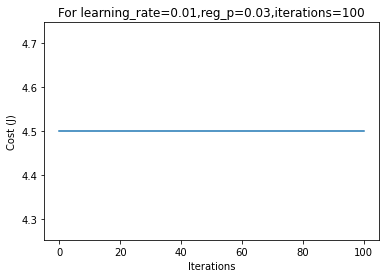

In [13]:
plt.plot(J_history_o)
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title("For learning_rate=0.01,reg_p=0.03,iterations=100")

Checking our model with cross-validation data:

In [14]:
"""Cross-Validation:"""

X_c = np.array([[1,5]])
o, o1 = forward_propagation(model,X_c)
print('The output of the cross-validation data:',o)

The output of the cross-validation data: [[0.]]


Performing Multiplication of two inputs using ANN model:

In [15]:

X = np.array([[1,2]]) #input data

y_actual = np.array([[2]])  #output data
#Initialize hyper parameters

learning_rate,reg_p,iterations = 0.01,0.0,100 #reg_p = regularization parameter

#Model
m = len(X)   #number of input samples
n = len(X[0])  #number of input features

n_h1 = 2 #number of nodes in hidden layer-1
n_output = 1 #number of output nodes

#Parameter Initialization
W1 = np.random.randn(n, n_h1)/np.sqrt(n) #weights of first layer -- n*n_h1 order of matrix
W2 = np.random.randn(n_h1, n_output)/np.sqrt(n_h1) #weights of second layer -- n_h1*n_output order of matrix

b1 = np.zeros((m, n_h1)) #bias of first layer -- m*n_h1 order of matrix
b2 = np.zeros((m, n_output)) #bias of second layer -- m*n_output order of matrix

model = {'W1': W1, 'b1':b1, 'a1':'ReLu',
         'W2': W2, 'b2':b2, 'a2':'ReLu'}



In [16]:
#Gradient Descent
print(model)
model_o, J_history_o = gradient_descent0_R(model, X, y_actual, learning_rate=learning_rate, reg_p=reg_p, iterations=iterations)
print(model_o)
print('Minimum Cost Function value:',min(J_history_o))



{'W1': array([[ 0.16131537, -1.17671644],
       [ 0.1067022 , -0.39154986]]), 'b1': array([[0., 0.]]), 'a1': 'ReLu', 'W2': array([[-0.16311149],
       [-0.09376897]]), 'b2': array([[0.]]), 'a2': 'ReLu'}
{'W1': array([[ 0.16131537, -1.17671644],
       [ 0.1067022 , -0.39154986]]), 'b1': array([[0., 0.]]), 'a1': 'ReLu', 'W2': array([[-0.16311149],
       [-0.09376897]]), 'b2': array([[0.]]), 'a2': 'ReLu'}
Minimum Cost Function value: 2.0


RESULTS for Multiplication:

Text(0.5, 1.0, 'For learning_rate=0.01,reg_p=0.03,iterations=100')

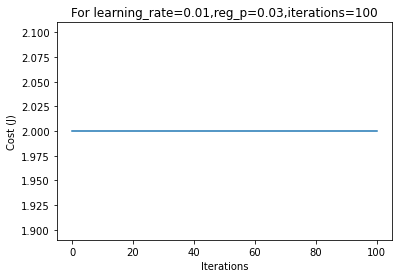

In [17]:
plt.plot(J_history_o)
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title("For learning_rate=0.01,reg_p=0.03,iterations=100")

Checking multiplication ANN model with cross-validation data:

In [18]:
"""Cross-Validation:"""

X_c = np.array([[1,5]])
o, o1 = forward_propagation(model,X_c)
print('The output of the cross-validation data:',o)

The output of the cross-validation data: [[0.]]
